In [1]:
from graph import *
%matplotlib inline

-> ajouter poids ou non dans graphe ?

-> todo label tridimensionel

-> calculer matrice labels

-> envoyer visualisation

In [2]:
%%time
db, path = gen_export_db(50,20,10,5,0.05)

Wall time: 975 ms


In [3]:
path

'dbs/db-1549629066.858862.dat'

In [4]:
db.shape

(1050, 2)

In [5]:
db[:,1]

array(['cube', 'cube', 'cube', ..., 'star', 'star', 'star'], dtype=object)

In [6]:
np.unique(db[:,1],return_counts=True)

(array(['chain', 'cube', 'grid', 'ring', 'star', 'tree'], dtype=object),
 array([168, 168, 231, 168, 147, 168], dtype=int64))

In [7]:
from kernels import *

max N 20
0.8333333333333334
Wall time: 6.2 s


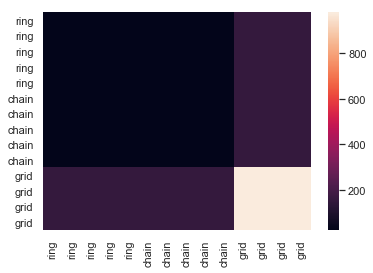

In [9]:
%%time
db2, path = gen_export_db(4,4,10,5,0.1,True)
test(db2)
# somme de k = Wx.shape ou 10xWx.shape ne change rien
#normalisé bcp plus rapide (pas toujour)
# certains ont un meilleur score avec d'autres que eux mêmes 
#affichage des graphes et dérouler l'algo à la main pour les carrés noir
#faire avec labels 2~5 et essayer d'avoir des distributions de labels pas trop différentes entre les toplogies

In [12]:
[print(x) for x in db2[:,1]]

cube
cube
cube
cube
cube
cube
cube
cube
cube
cube
chain
chain
chain
chain
chain
ring
ring
ring
ring
ring


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [9]:
from time import time
X = []
Y = []aa
#on varie nb altered
for i in range(1,4):
    X.append(i*3)
    db2, path = gen_export_db(3,i,10,5,0.05)
    t = time()
    test(db2)
    diff = time()-t
    Y.append(diff)
import matplotlib.pyplot as plt
plt.plot(X,Y)
plt.title("Complexité du calcul du noyau + apprentissage SVM en fonction du nombre de graphes de 8<=N<=10")

SyntaxError: invalid syntax (<ipython-input-9-b615c2e80e1f>, line 3)

In [ ]:
import seaborn as sns

In [ ]:
v = np.random.random((5))
v2 = np.random.random((5))
v3 = np.random.random((5))
v4 = np.random.random((5))
#v /= np.linalg.norm(v)
#v2 /= np.linalg.norm(v2)
#v3 /= np.linalg.norm(v3)
#v4 /= np.linalg.norm(v4)
db = [v,v2,v3,v4]
gram = np.empty((len(db),len(db)))
for i in range(len(db)):
    for j in range(i+1):
        ker = np.dot(db[i],db[j])
        gram[i, j] = ker
        if i != j:
            gram[j, i] = ker
sns.heatmap(gram)

In [1]:
from graph import *

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


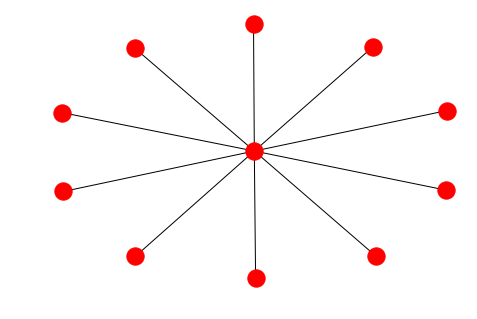

In [2]:
gen_and_draw("star",10,1)

In [12]:
GS = gen_graph("star",2,1)
A_ = nx.to_numpy_matrix(GS).T
D = np.diagflat(1/np.sum(A_,axis=0))
A = A_ @ D

In [13]:
np.sum(A,axis=0)

matrix([[1., 1., 1.]])

In [14]:
G2 = gen_graph("star",3,1)
A_ = nx.to_numpy_matrix(G2).T
D = np.diagflat(1/np.sum(A_,axis=0))
A2 = A_ @ D

In [15]:
np.sum(A2,axis=0)

matrix([[1., 1., 1., 1.]])

In [16]:
W = np.kron(A,A2)

In [17]:
np.sum(W,axis=0)

matrix([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [21]:
W

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         1.        , 1.        , 1.        , 0.        , 1.        ,
         1.        , 1.        ],
        [0.        , 0.        , 0.        , 0.        , 0.33333333,
         0.        , 0.        , 0.        , 0.33333333, 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.33333333,
         0.        , 0.        , 0.        , 0.33333333, 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.33333333,
         0.        , 0.        , 0.        , 0.33333333, 0.        ,
         0.        , 0.        ],
        [0.        , 0.5       , 0.5       , 0.5       , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        ],
        [0.16666667, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
  